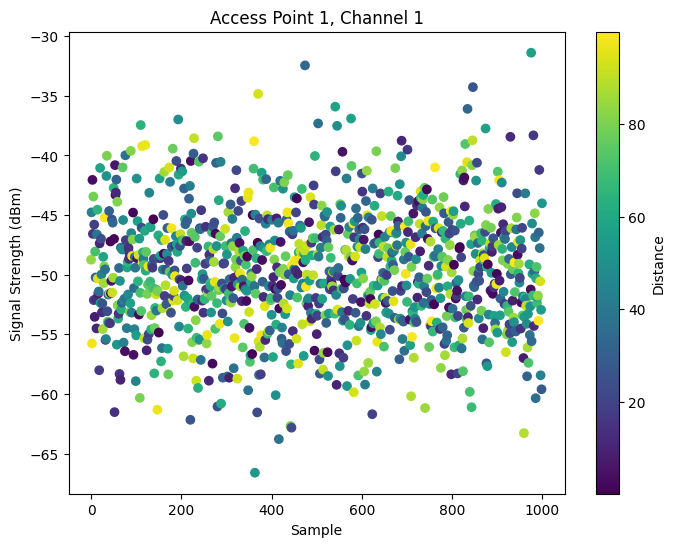

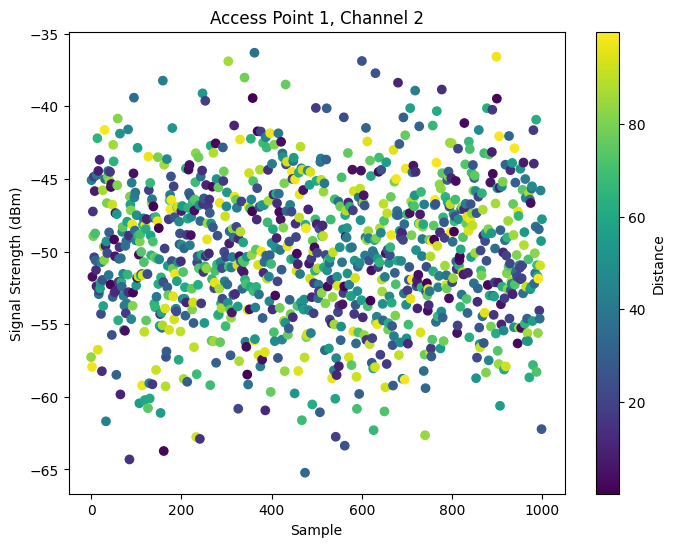

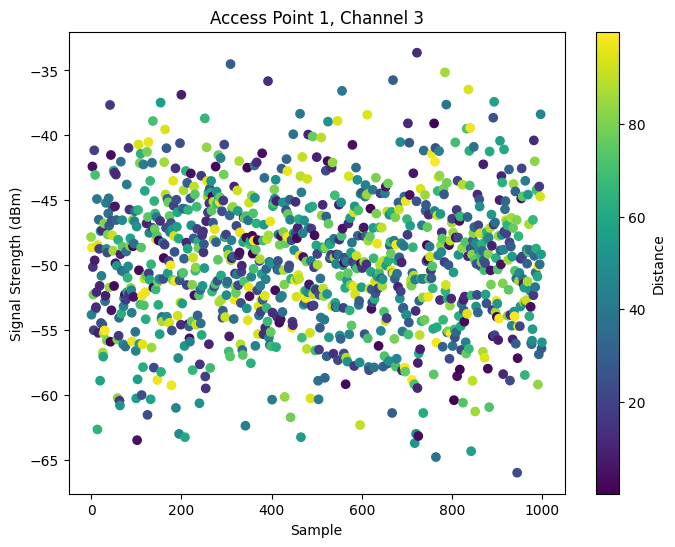

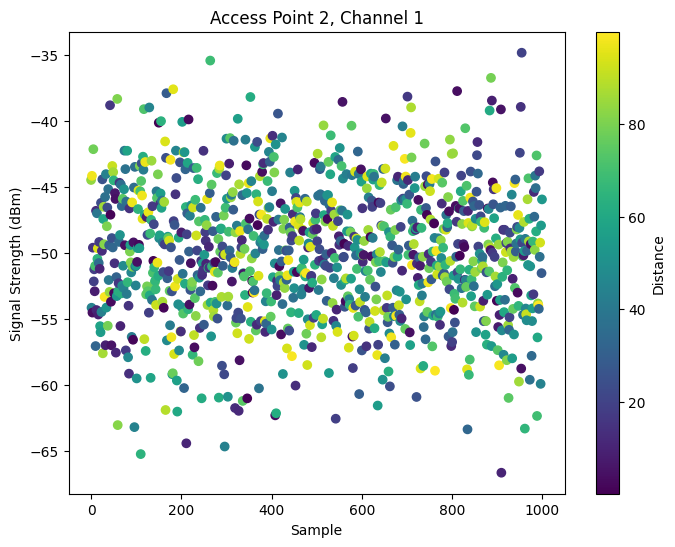

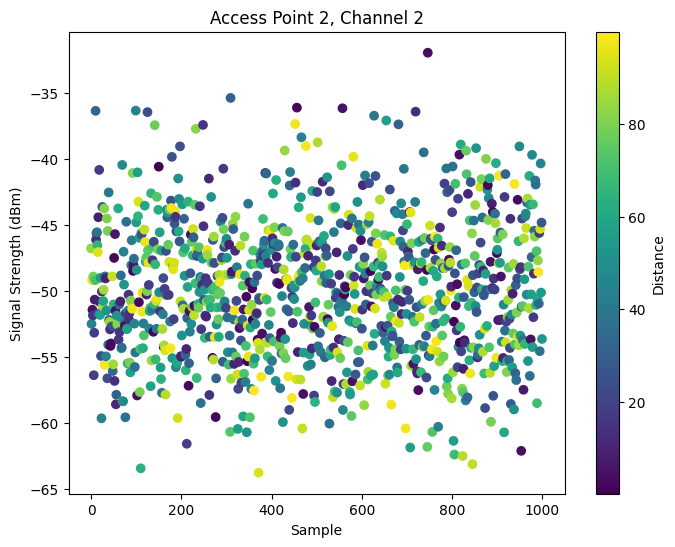

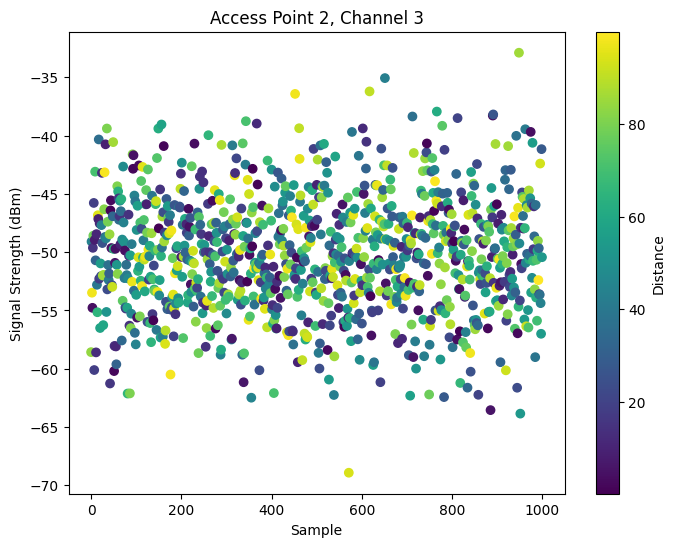

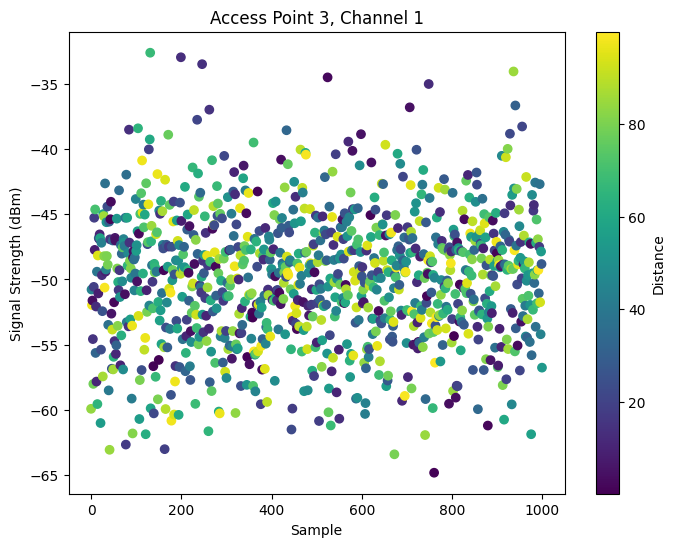

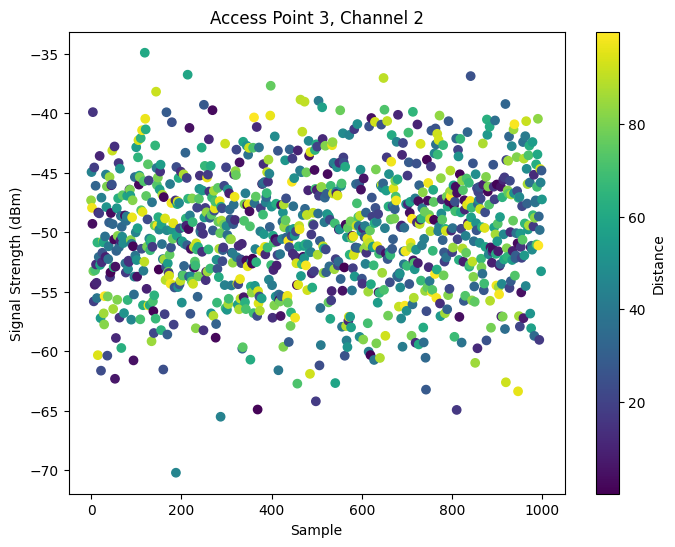

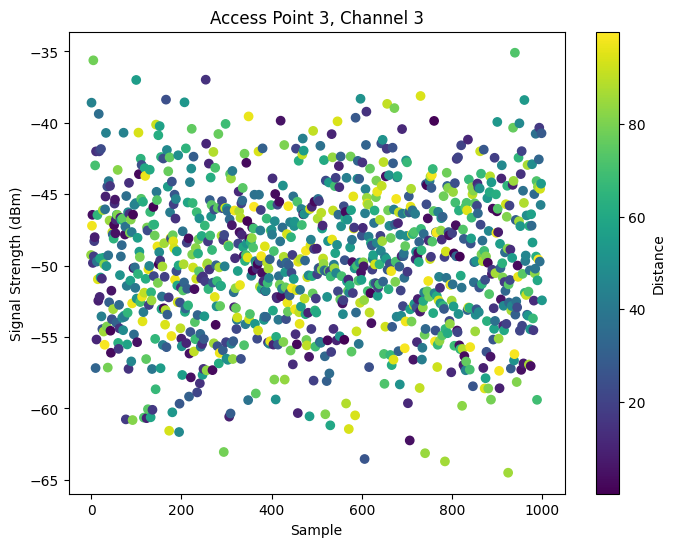

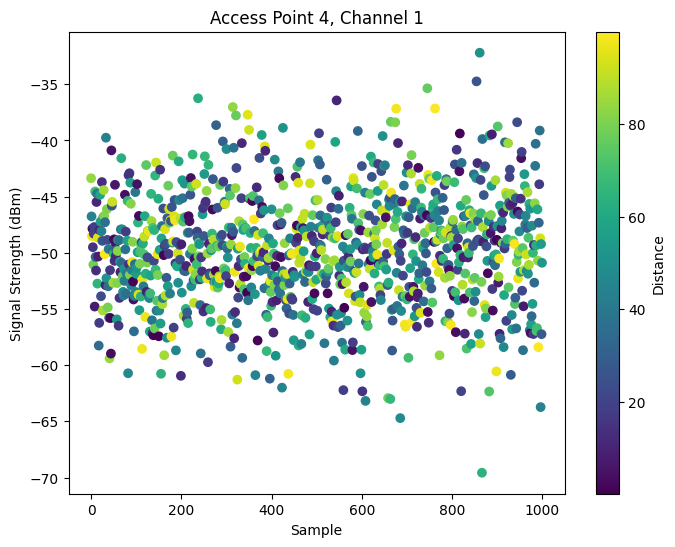

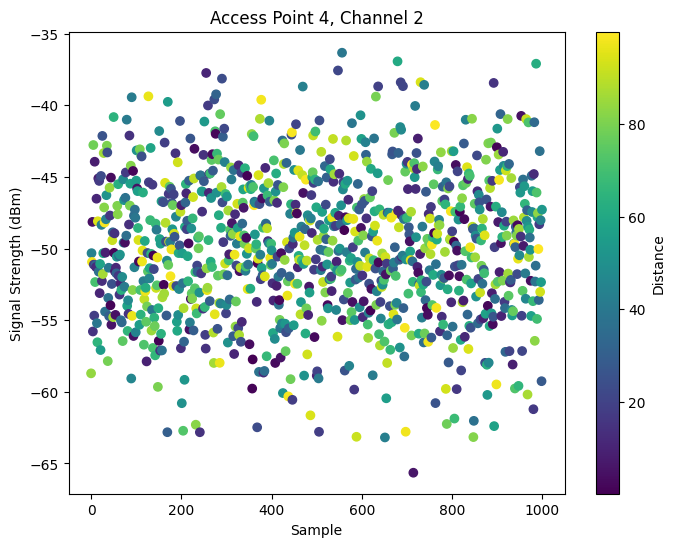

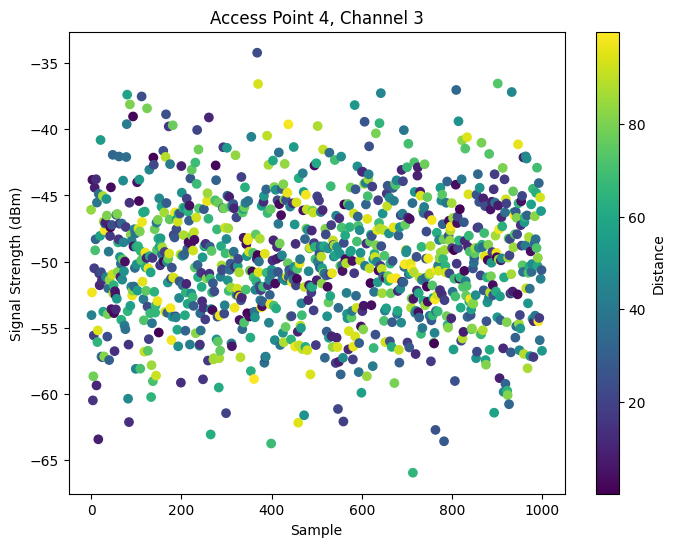

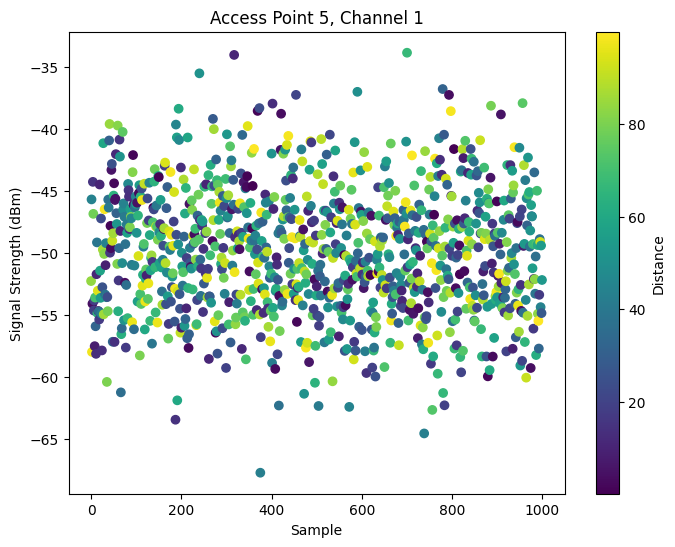

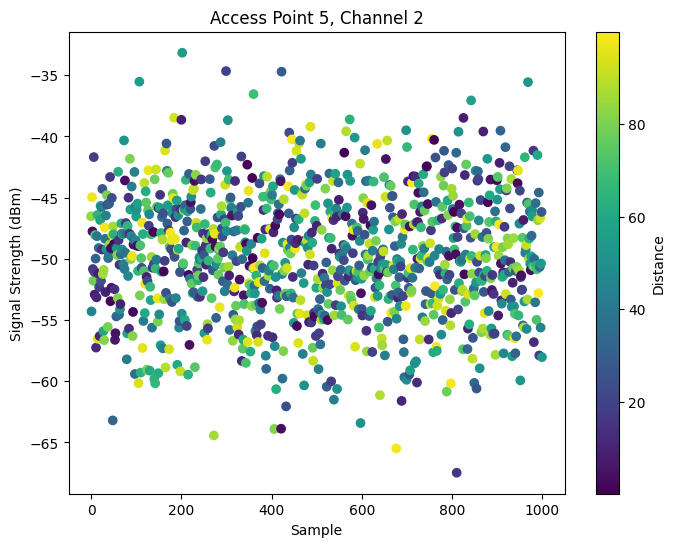

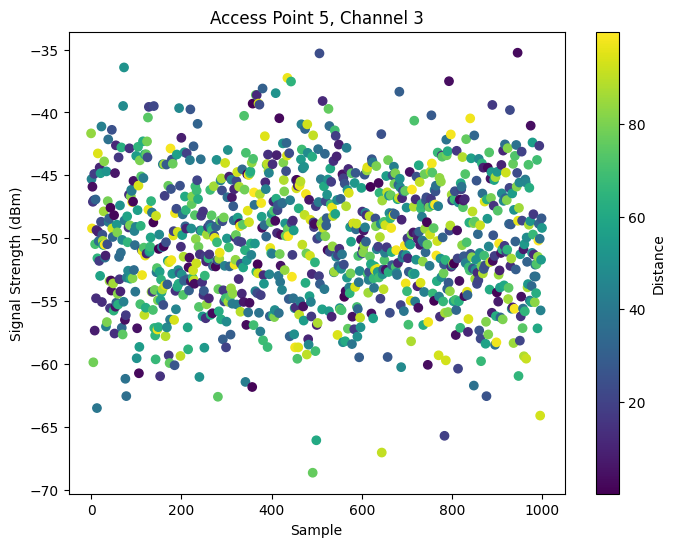

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
num_access_points = 5  # Number of access points
num_samples = 1000  # Number of samples
num_channels = 3  # Number of frequency channels
signal_strength_mean = -50  # Mean signal strength in dBm
signal_strength_std = 5  # Standard deviation of signal strength in dBm

# Generate synthetic RF signal data
def generate_rf_data(num_samples, num_access_points, num_channels, mean, std):
    rf_data = np.zeros((num_samples, num_access_points, num_channels))
    distances = np.random.uniform(0, 100, num_samples)  # Generate random distances for each sample
    for i in range(num_samples):
        for j in range(num_access_points):
            for k in range(num_channels):
                rf_data[i, j, k] = np.random.normal(mean, std)
    return rf_data, distances

# Generate synthetic RF signal data and distances
rf_signal_data, distances = generate_rf_data(num_samples, num_access_points, num_channels, signal_strength_mean, signal_strength_std)

# Plot scatter plots with distance information
for i in range(num_access_points):
    for j in range(num_channels):
        plt.figure(figsize=(8, 6))
        plt.title(f"Access Point {i+1}, Channel {j+1}")
        plt.scatter(range(num_samples), rf_signal_data[:, i, j], c=distances, cmap='viridis')
        plt.xlabel("Sample")
        plt.ylabel("Signal Strength (dBm)")
        plt.colorbar(label="Distance")
        plt.show()

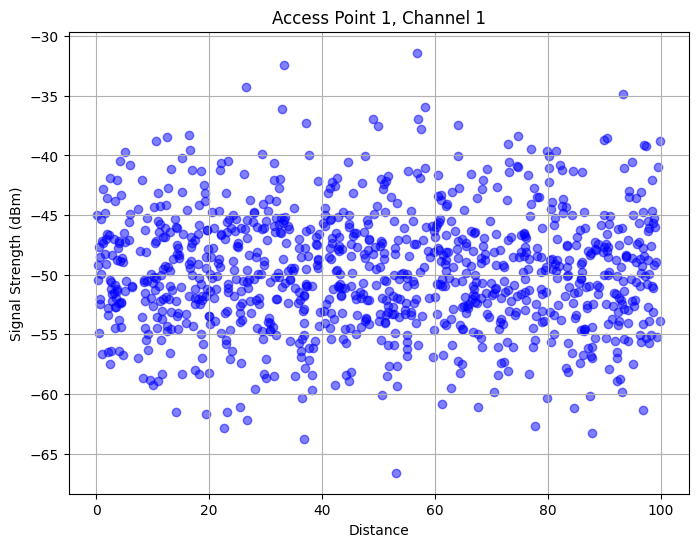

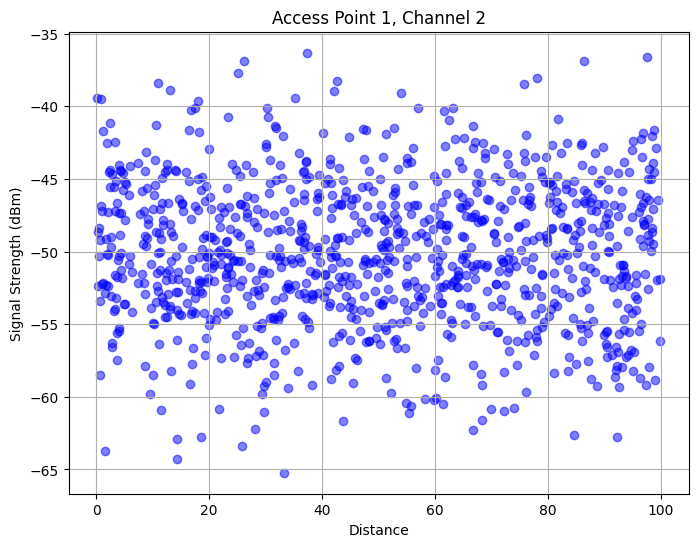

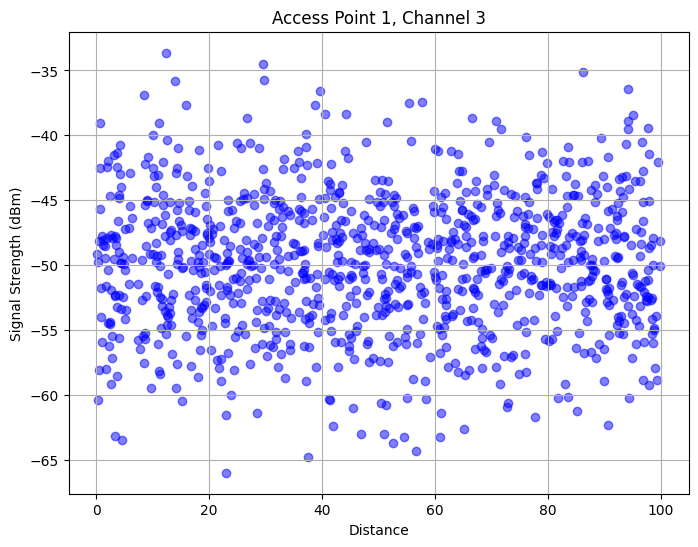

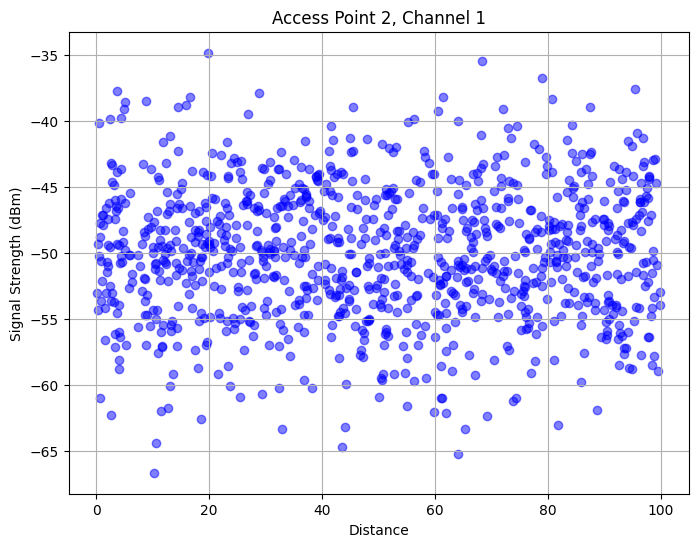

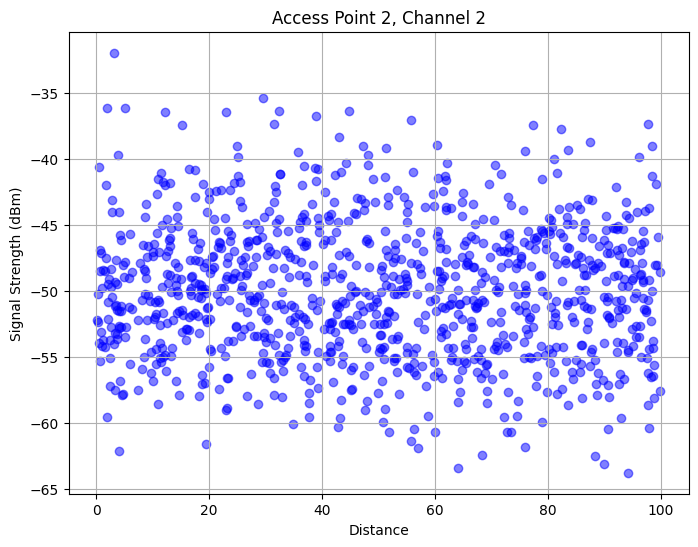

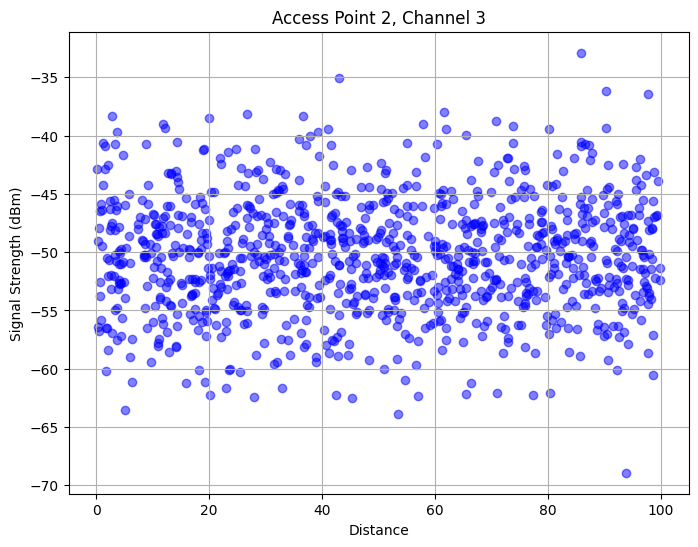

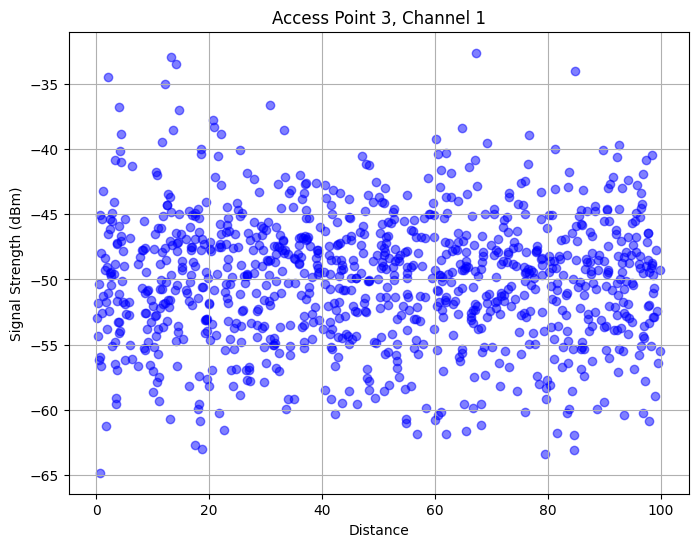

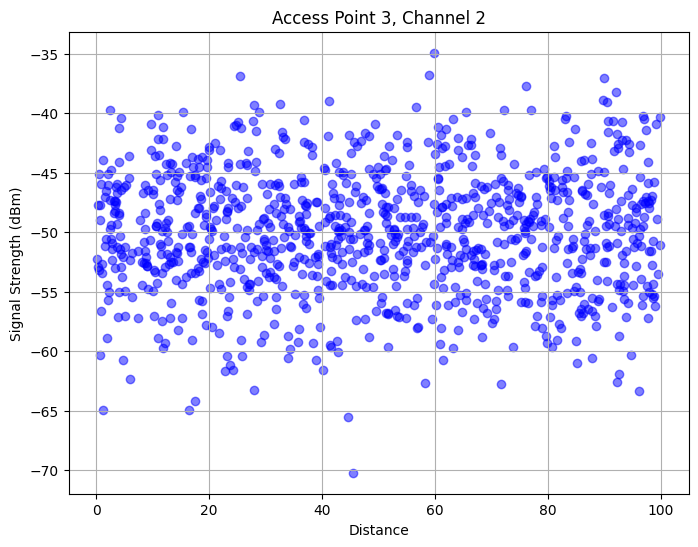

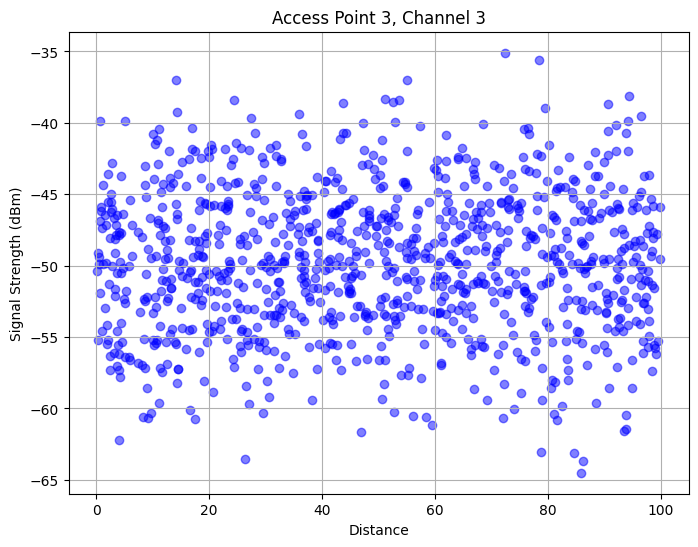

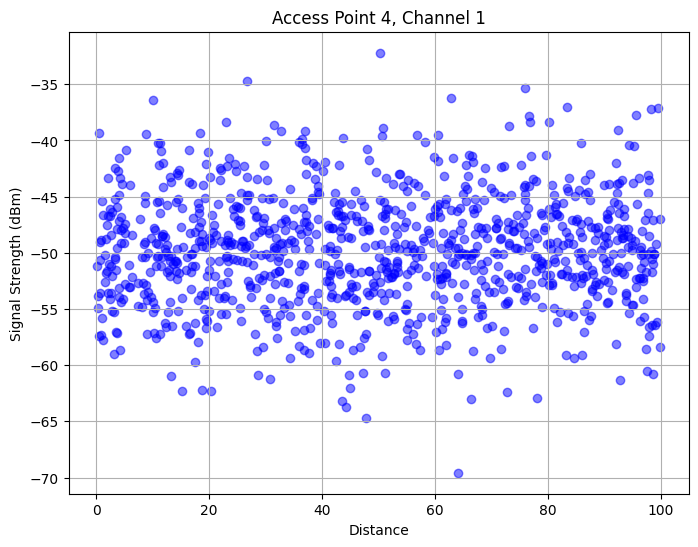

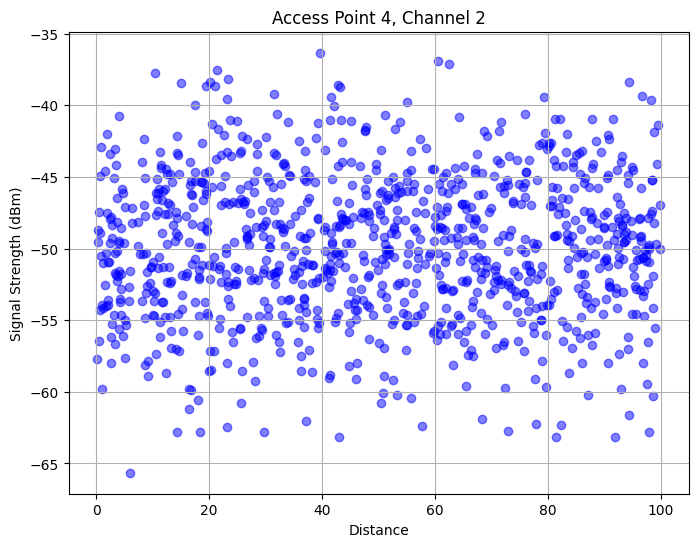

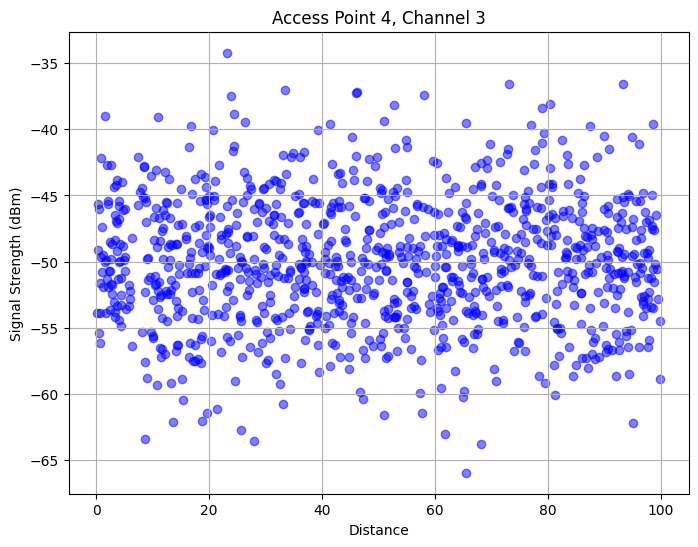

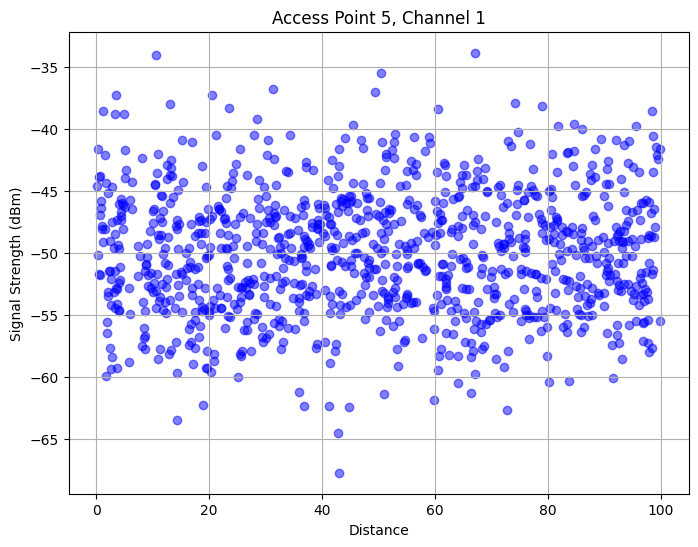

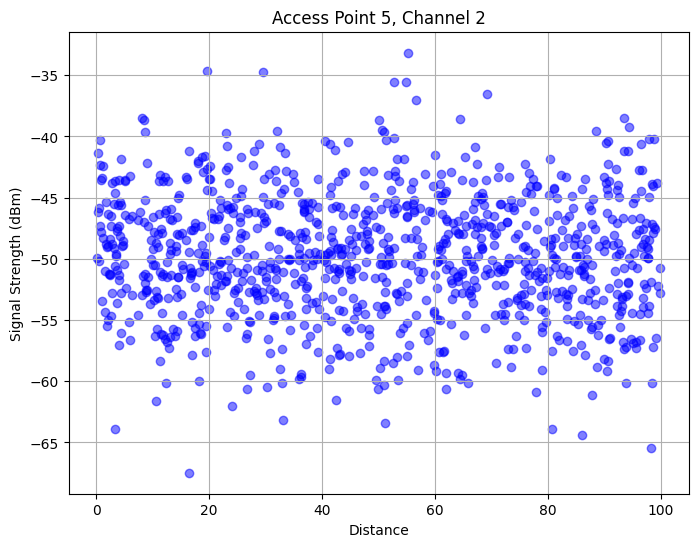

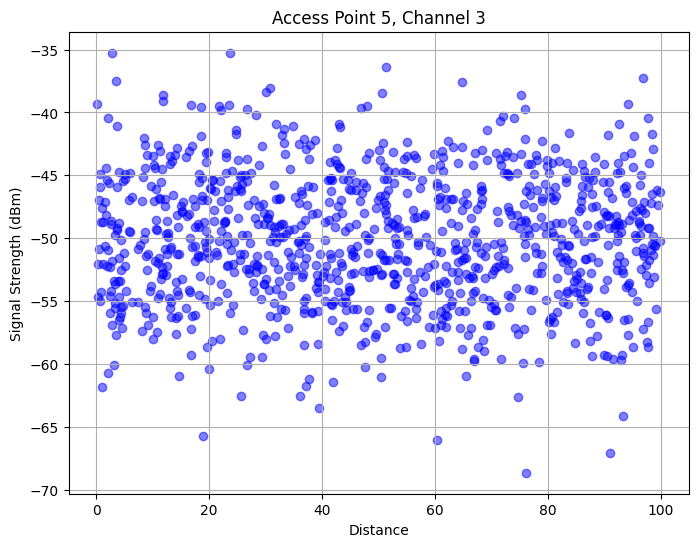

In [4]:
for i in range(num_access_points):
    for j in range(num_channels):
        plt.figure(figsize=(8, 6))
        plt.title(f"Access Point {i+1}, Channel {j+1}")
        plt.scatter(distances, rf_signal_data[:, i, j], c='b', alpha=0.5)
        plt.xlabel("Distance")
        plt.ylabel("Signal Strength (dBm)")
        plt.grid(True)
        plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (15000,) 

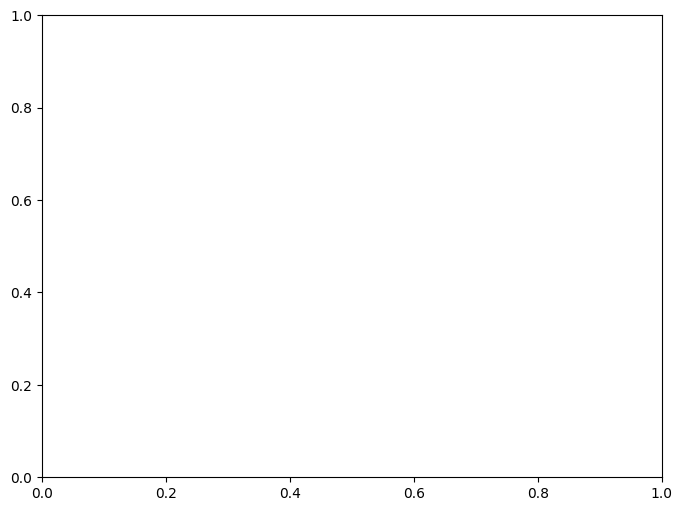

In [6]:
plt.figure(figsize=(8, 6))
plt.hexbin(distances, rf_signal_data.flatten(), gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel('Distance')
plt.ylabel('Signal Strength (dBm)')
plt.title('Hexbin Plot of Signal Strength vs Distance')
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (15000,) 

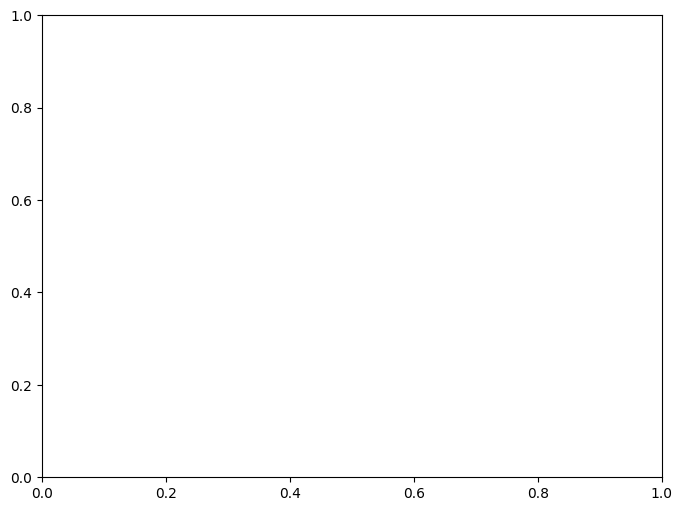

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
num_access_points = 5  # Number of access points
num_samples = 1000  # Number of samples
num_channels = 3  # Number of frequency channels
signal_strength_mean = -50  # Mean signal strength in dBm
signal_strength_std = 5  # Standard deviation of signal strength in dBm

# Generate synthetic RF signal data
def generate_rf_data(num_samples, num_access_points, num_channels, mean, std):
    rf_data = np.zeros((num_samples, num_access_points, num_channels))
    distances = np.random.uniform(0, 100, num_samples)  # Generate random distances for each sample
    for i in range(num_samples):
        for j in range(num_access_points):
            for k in range(num_channels):
                rf_data[i, j, k] = np.random.normal(mean, std)
    return rf_data, distances

# Generate synthetic RF signal data and distances
rf_signal_data, distances = generate_rf_data(num_samples, num_access_points, num_channels, signal_strength_mean, signal_strength_std)

# Create a hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(distances, rf_signal_data.flatten(), gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel('Distance')
plt.ylabel('Signal Strength (dBm)')
plt.title('Hexbin Plot of Signal Strength vs Distance')
plt.show()

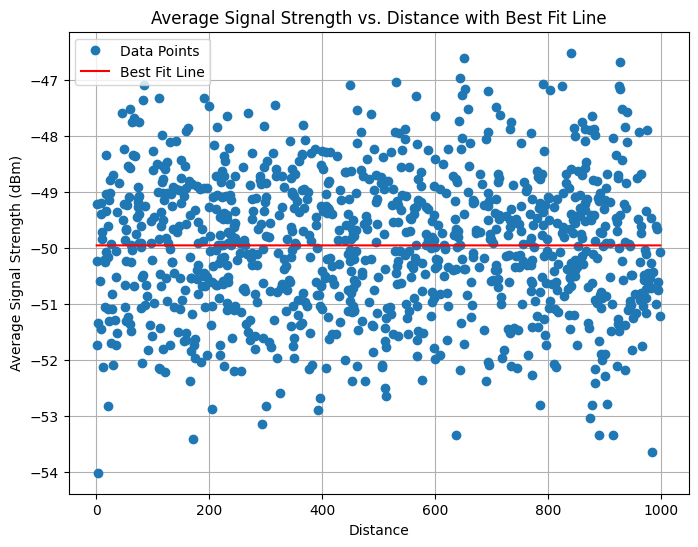

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
num_access_points = 5  # Number of access points
num_samples = 1000  # Number of samples
num_channels = 3  # Number of frequency channels
signal_strength_mean = -50  # Mean signal strength in dBm
signal_strength_std = 5  # Standard deviation of signal strength in dBm

# Generate synthetic RF signal data
def generate_rf_data(num_samples, num_access_points, num_channels, mean, std):
    rf_data = np.zeros((num_samples, num_access_points, num_channels))
    distances = np.random.uniform(0, 1000, num_samples)  # Generate random distances for each sample
    for i in range(num_samples):
        for j in range(num_access_points):
            for k in range(num_channels):
                rf_data[i, j, k] = np.random.normal(mean, std)
    return rf_data, distances

# Generate synthetic RF signal data and distances
rf_signal_data, distances = generate_rf_data(num_samples, num_access_points, num_channels, signal_strength_mean, signal_strength_std)

# Compute the mean signal strength for each distance value
unique_distances = np.unique(distances)
mean_signal_strengths = np.zeros_like(unique_distances, dtype=float)
for i, d in enumerate(unique_distances):
    mean_signal_strengths[i] = np.mean(rf_signal_data[distances == d])

# Perform linear regression to find the best-fit line
coefficients = np.polyfit(unique_distances, mean_signal_strengths, 1)
best_fit_line = np.poly1d(coefficients)

# Plot the average signal strength vs. distance with the best-fit line
plt.figure(figsize=(8, 6))
plt.plot(unique_distances, mean_signal_strengths, marker='o', linestyle='', label='Data Points')
plt.plot(unique_distances, best_fit_line(unique_distances), linestyle='-', color='red', label='Best Fit Line')
plt.xlabel('Distance')
plt.ylabel('Average Signal Strength (dBm)')
plt.title('Average Signal Strength vs. Distance with Best Fit Line')
plt.grid(True)
plt.legend()
plt.show()

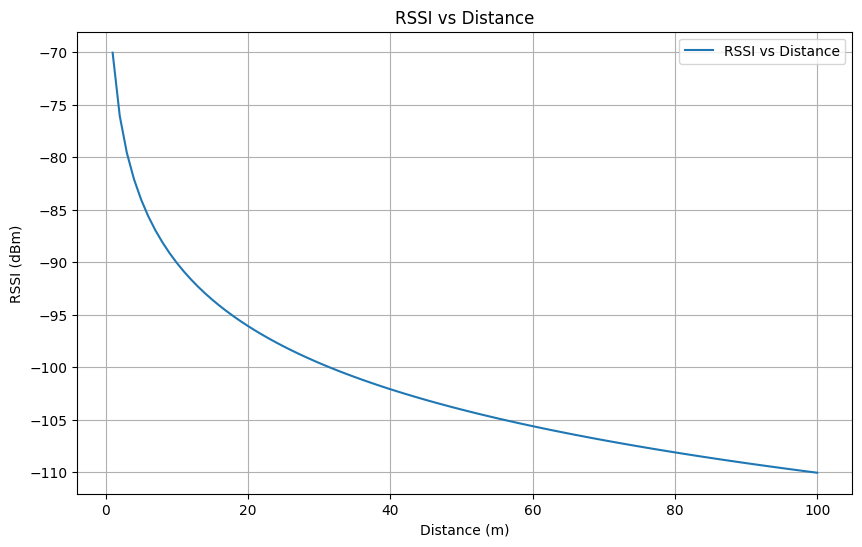

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rssi(distance, frequency, transmitted_power):
    c = 3e8  # Speed of light in m/s
    fspl = 20 * np.log10(distance) + 20 * np.log10(frequency) + 20 * np.log10(4 * np.pi / c)
    rssi = transmitted_power - fspl
    return rssi

# Constants
frequency = 2.4e9  # 2.4 GHz
transmitted_power = -30  # dBm

# Distance range
distances = np.linspace(1, 100, 100)  # Meters

# Calculate RSSI for each distance
rssi_values = calculate_rssi(distances, frequency, transmitted_power)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distances, rssi_values, label='RSSI vs Distance')
plt.title('RSSI vs Distance')
plt.xlabel('Distance (m)')
plt.ylabel('RSSI (dBm)')
plt.grid(True)
plt.legend()
plt.show()

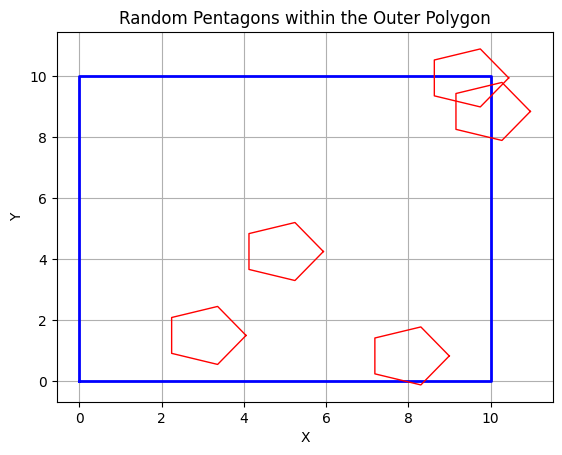

In [16]:
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius):
    pentagons = []
    min_x, min_y, max_x, max_y = outer_polygon.bounds
    for _ in range(num_pentagons):
        # Generate a random position within the outer polygon
        while True:
            random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
            if outer_polygon.contains(random_point):
                center = (random_point.x, random_point.y)
                break
        
        # Generate vertices for the pentagon
        vertices = []
        for i in range(5):
            angle = 2 * math.pi * i / 5
            vertex_x = center[0] + pentagon_radius * math.cos(angle)
            vertex_y = center[1] + pentagon_radius * math.sin(angle)
            vertices.append((vertex_x, vertex_y))
        
        # Create polygon from generated vertices
        pentagons.append(Polygon(vertices))
    return pentagons

# Define the outer polygon (larger polygon)
outer_polygon = Polygon([(0, 0), (0, 10), (10, 10), (10, 0)])

# Calculate maximum pentagon size based on the outer polygon
pentagon_radius = min(outer_polygon.bounds[2] - outer_polygon.bounds[0],
                      outer_polygon.bounds[3] - outer_polygon.bounds[1]) / 10  # Adjust divisor for desired size

# Generate random pentagons within the outer polygon
num_pentagons = 5
random_pentagons = generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius)

# Plot the outer polygon and random pentagons
fig, ax = plt.subplots()
ax.plot(*outer_polygon.exterior.xy, color='blue', linewidth=2)
for pentagon in random_pentagons:
    ax.plot(*pentagon.exterior.xy, color='red', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Pentagons within the Outer Polygon')
plt.grid(True)
plt.show()

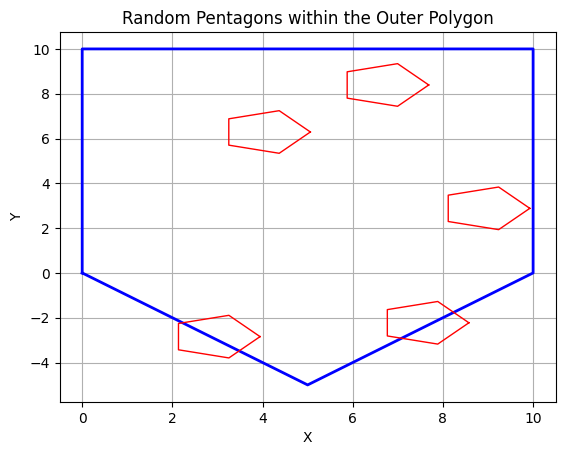

In [25]:
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius):
    pentagons = []
    min_x, min_y, max_x, max_y = outer_polygon.bounds

    for _ in range(num_pentagons):
        # Generate a random position within the outer polygon with enough distance from the boundary
        while True:
            random_point = (np.random.uniform(min_x + pentagon_radius, max_x - pentagon_radius),
                            np.random.uniform(min_y + pentagon_radius, max_y - pentagon_radius))
            if outer_polygon.contains(Point(random_point)):
                break
        
        # Generate vertices for the pentagon
        vertices = []
        for i in range(5):
            angle = 2 * math.pi * i / 5
            vertex_x = random_point[0] + pentagon_radius * math.cos(angle)
            vertex_y = random_point[1] + pentagon_radius * math.sin(angle)
            vertices.append((vertex_x, vertex_y))
        
        # Create polygon from generated vertices
        pentagons.append(Polygon(vertices))
    return pentagons

# Define the outer polygon (larger pentagon)
outer_polygon = Polygon([(0, 0), (0, 10), (10, 10), (10, 0), (5, -5)])

# Calculate maximum pentagon size based on the outer polygon
pentagon_radius = min(outer_polygon.bounds[2] - outer_polygon.bounds[0],
                      outer_polygon.bounds[3] - outer_polygon.bounds[1]) / 10  # Adjust divisor for desired size

# Generate random pentagons within the outer polygon
num_pentagons = 5
random_pentagons = generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius)

# Plot the outer polygon and random pentagons
fig, ax = plt.subplots()
ax.plot(*outer_polygon.exterior.xy, color='blue', linewidth=2)
for pentagon in random_pentagons:
    ax.plot(*pentagon.exterior.xy, color='red', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Pentagons within the Outer Polygon')
plt.grid(True)
plt.show()

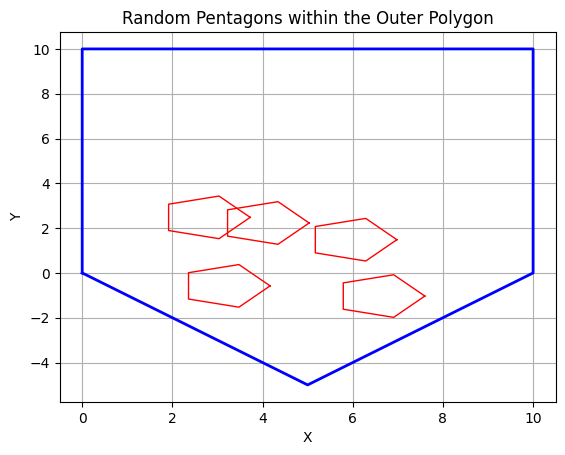

In [20]:
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius):
    pentagons = []
    min_x, min_y, max_x, max_y = outer_polygon.bounds
    
    for _ in range(num_pentagons):
        # Generate a random position within the outer polygon with enough distance from the boundary
        while True:
            random_point = (np.random.uniform(min_x + pentagon_radius, max_x - pentagon_radius),
                            np.random.uniform(min_y + pentagon_radius, max_y - pentagon_radius))
            if outer_polygon.contains(Point(random_point)):
                break
        
        # Generate vertices for the pentagon
        vertices = []
        for i in range(5):
            angle = 2 * math.pi * i / 5
            vertex_x = random_point[0] + pentagon_radius * math.cos(angle)
            vertex_y = random_point[1] + pentagon_radius * math.sin(angle)
            vertices.append((vertex_x, vertex_y))
        
        # Create polygon from generated vertices
        pentagons.append(Polygon(vertices))
    return pentagons

# Define the outer polygon (larger pentagon)
outer_polygon = Polygon([(0, 0), (0, 10), (10, 10), (10, 0), (5, -5)])

# Calculate maximum pentagon size based on the outer polygon
pentagon_radius = min(outer_polygon.bounds[2] - outer_polygon.bounds[0],
                      outer_polygon.bounds[3] - outer_polygon.bounds[1]) / 10  # Adjust divisor for desired size

# Generate random pentagons within the outer polygon
num_pentagons = 5
random_pentagons = generate_random_pentagons(outer_polygon, num_pentagons, pentagon_radius)

# Plot the outer polygon and random pentagons
fig, ax = plt.subplots()
ax.plot(*outer_polygon.exterior.xy, color='blue', linewidth=2)
for pentagon in random_pentagons:
    ax.plot(*pentagon.exterior.xy, color='red', linewidth=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Pentagons within the Outer Polygon')
plt.grid(True)
plt.show()